## Homography in tensorflow

This notebook was written together with [this blog post](http://kindoblue.nl/neural-network/tensorflow-homography)



In [1]:
import tensorflow as tf

In [2]:
def ax(p, q):   
    return [ p[0], p[1], -1, 0, 0, 0, -p[0] * q[0], -p[1] * q[0] ]
    
def ay(p, q):
    return [ 0, 0, 0, p[0], p[1], 1, -p[0] * q[1], -p[1] * q[1] ]

def homography(x1s, x2s):

    p = []
    
    # we build matrix A by using only 4 point correspondence. The linear
    # system is solved with the least square method, so here 
    # we could even pass more correspondence 
    p.append(ax(x1s[0], x2s[0]))
    p.append(ay(x1s[0], x2s[0]))

    p.append(ax(x1s[1], x2s[1]))
    p.append(ay(x1s[1], x2s[1]))   
    
    p.append(ax(x1s[2], x2s[2]))
    p.append(ay(x1s[2], x2s[2]))
   
    p.append(ax(x1s[3], x2s[3]))
    p.append(ay(x1s[3], x2s[3]))
    
    # A is 8x8
    A = tf.stack(p, axis=0)  
    
    m = [[x2s[0][0], x2s[0][1], x2s[1][0], x2s[1][1], x2s[2][0], x2s[2][1], x2s[3][0], x2s[3][1]]]

    # P is 8x1
    P = tf.transpose(tf.stack(m, axis=0))  
      
    # here we solve the linear system
    # we transpose the result for convenience
    return tf.transpose(tf.matrix_solve_ls(A, P, fast=True))

In [3]:
# read the jpeg
file_content = tf.read_file('test.jpg')

# decode the jpeg
imgt = tf.image.decode_jpeg(file_content, channels=3)

In [9]:
# get 4 random points
norm = tf.truncated_normal([4, 2], mean=0, stddev=60)

# the source points are the image vertexes
src = tf.constant([[0, 0], [720, 0], [0, 576], [720, 576]], dtype=tf.float32)

# get a random destination box
dst = src + norm

# calculate homography
h = homography(src, dst)

# apply the homography and return the image
new_img = tf.contrib.image.transform(imgt, h, interpolation="BILINEAR")
new_img

<tf.Tensor 'strided_slice_163:0' shape=(?, ?, 3) dtype=uint8>

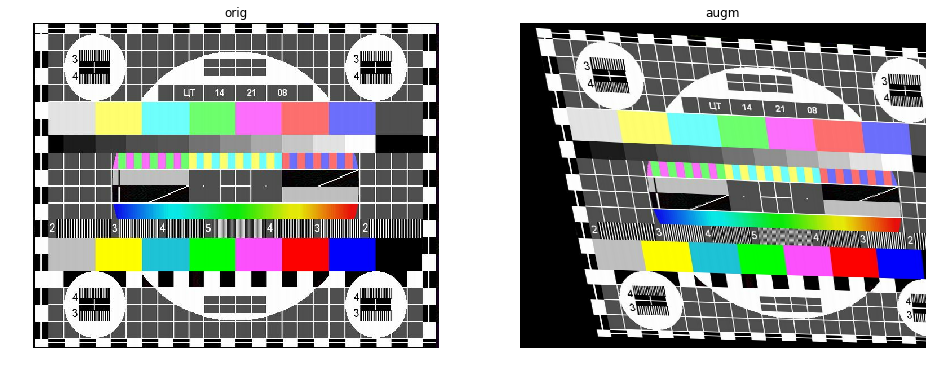

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline

sess = tf.InteractiveSession()
r = sess.run([imgt, new_img])


# create the plot
fig, axs = plt.subplots(1,2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('orig')
axs[0].imshow(r[0])

axs[1].axis('off')
axs[1].set_title('augm')
axs[1].imshow(r[1])